<a href="https://colab.research.google.com/github/rocket0l4/Coin-fetch-by-api/blob/main/Bitcoin_USD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using CoinCap API
- Code for bitcoin

In [82]:
import requests
import csv
import json

url = "http://api.coincap.io/v2/assets/bitcoin/history?interval=d1"

payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)

json_data = json.loads(response.text.encode('utf8'))

print(response.text)


{"data":[{"priceUsd":"28425.9390384788394190","time":1697587200000,"date":"2023-10-18T00:00:00.000Z"},{"priceUsd":"28501.6212051095234723","time":1697673600000,"date":"2023-10-19T00:00:00.000Z"},{"priceUsd":"29441.7760382822791118","time":1697760000000,"date":"2023-10-20T00:00:00.000Z"},{"priceUsd":"29809.0678067372593164","time":1697846400000,"date":"2023-10-21T00:00:00.000Z"},{"priceUsd":"29932.5120323615626651","time":1697932800000,"date":"2023-10-22T00:00:00.000Z"},{"priceUsd":"30903.0017370652849999","time":1698019200000,"date":"2023-10-23T00:00:00.000Z"},{"priceUsd":"34091.9383246364581846","time":1698105600000,"date":"2023-10-24T00:00:00.000Z"},{"priceUsd":"34343.0471117549479106","time":1698192000000,"date":"2023-10-25T00:00:00.000Z"},{"priceUsd":"34350.9392214659616005","time":1698278400000,"date":"2023-10-26T00:00:00.000Z"},{"priceUsd":"33985.1472264457187908","time":1698364800000,"date":"2023-10-27T00:00:00.000Z"},{"priceUsd":"34123.2722850980651721","time":1698451200000,"da

#Storing the data

In [83]:
bitcoin_data = json_data['data']

In [84]:
import pandas as pd
df = pd.DataFrame(bitcoin_data)
df.to_csv('bitcoin-usd.csv',index = False)

In [85]:
df

,priceUsd,time,date
0,28425.9390384788394190,1697587200000,2023-10-18T00:00:00.000Z
1,28501.6212051095234723,1697673600000,2023-10-19T00:00:00.000Z
2,29441.7760382822791118,1697760000000,2023-10-20T00:00:00.000Z
3,29809.0678067372593164,1697846400000,2023-10-21T00:00:00.000Z
4,29932.5120323615626651,1697932800000,2023-10-22T00:00:00.000Z
...,...,...,...
359,61498.3044578771164875,1728604800000,2024-10-11T00:00:00.000Z
360,62932.7344132252602975,1728691200000,2024-10-12T00:00:00.000Z
361,62748.4623359981551177,1728777600000,2024-10-13T00:00:00.000Z
362,64749.1493341027516581,1728864000000,2024-10-14T00:00:00.000Z


In [86]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   priceUsd  364 non-null    object             
 1   time      364 non-null    int64              
 2   date      364 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(1), object(1)
memory usage: 8.7+ KB


#Only required columns saved

In [87]:
df = pd.DataFrame(bitcoin_data,columns=['priceUsd','date'])
df

,priceUsd,date
0,28425.9390384788394190,2023-10-18T00:00:00.000Z
1,28501.6212051095234723,2023-10-19T00:00:00.000Z
2,29441.7760382822791118,2023-10-20T00:00:00.000Z
3,29809.0678067372593164,2023-10-21T00:00:00.000Z
4,29932.5120323615626651,2023-10-22T00:00:00.000Z
...,...,...
359,61498.3044578771164875,2024-10-11T00:00:00.000Z
360,62932.7344132252602975,2024-10-12T00:00:00.000Z
361,62748.4623359981551177,2024-10-13T00:00:00.000Z
362,64749.1493341027516581,2024-10-14T00:00:00.000Z


#Converting into Datetime format

In [88]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   priceUsd  364 non-null    object             
 1   date      364 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), object(1)
memory usage: 5.8+ KB


In [89]:
df['date'] = df['date'].dt.tz_localize(None)
df

,priceUsd,date
0,28425.9390384788394190,2023-10-18
1,28501.6212051095234723,2023-10-19
2,29441.7760382822791118,2023-10-20
3,29809.0678067372593164,2023-10-21
4,29932.5120323615626651,2023-10-22
...,...,...
359,61498.3044578771164875,2024-10-11
360,62932.7344132252602975,2024-10-12
361,62748.4623359981551177,2024-10-13
362,64749.1493341027516581,2024-10-14


#Changing the PriceUSD datatype obj to float

In [90]:
df['priceUsd'] = pd.to_numeric(df['priceUsd'],errors = 'coerce')
# df['date'] = pd.to_numeric(df['date'],errors = 'coerce')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   priceUsd  364 non-null    float64       
 1   date      364 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [92]:
df

,priceUsd,date
0,28425.939038,2023-10-18
1,28501.621205,2023-10-19
2,29441.776038,2023-10-20
3,29809.067807,2023-10-21
4,29932.512032,2023-10-22
...,...,...
359,61498.304458,2024-10-11
360,62932.734413,2024-10-12
361,62748.462336,2024-10-13
362,64749.149334,2024-10-14


#Ploting graph between Coin price and Date

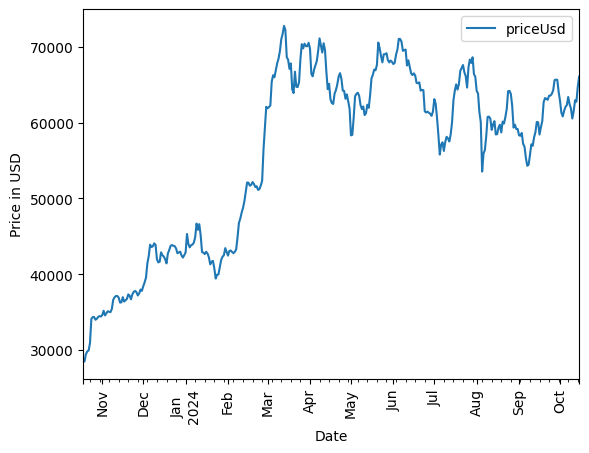

In [93]:
import matplotlib.pyplot as plt
df.plot(x = 'date', y = 'priceUsd',kind = 'line')
plt.xticks(rotation = 'vertical')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.show()